# ***1.6 Regression with Multiple Outputs***

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

class LinearRegression2:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.weights = None
        self.bias = None
        self.Loss_History = []

    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3):
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.Loss_History = []

        samples, features = X.shape
        outputs = y.shape[1]

        self.weights = np.zeros((features, outputs))
        self.bias = np.zeros(outputs)

        Size_of_validation = int(0.1 * samples)
        train_X = X[:-Size_of_validation]
        train_y = y[:-Size_of_validation]

        val_X   = X[-Size_of_validation:]
        val_y   = y[-Size_of_validation:]

        best_weights = self.weights.copy()
        best_bias = self.bias.copy()
        best_val_loss = float('inf')
        count = 0

        def Loss_Function(X, y):
            predictions = np.dot(X, self.weights) + self.bias
            loss = np.mean((predictions - y) ** 2) + (self.regularization * np.sum(self.weights ** 2))
            return loss

        for epoch in range(max_epochs):
            indices = np.arange(len(train_X))
            np.random.shuffle(indices)
            train_X = train_X[indices]
            train_y = train_y[indices]
            for start in range(0, len(train_X), batch_size):
                end = start + batch_size
                X_batch = train_X[start:end]
                y_batch = train_y[start:end]

                predictions = np.dot(X_batch, self.weights) + self.bias
                errors = predictions - y_batch

                grad_w = (2 / len(X_batch)) * (np.dot(X_batch.T, errors) + regularization * self.weights)
                grad_b = (2 / len(X_batch)) * np.sum(errors, axis=0)

                self.weights -= 0.01 * grad_w  # learning rate = 0.01
                self.bias -= 0.01 * grad_b

                loss = Loss_Function(train_X, train_y)
                self.Loss_History.append(loss)

            val_loss = Loss_Function(val_X, val_y)
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = self.weights.copy()
                best_bias = self.bias.copy()
                count = 0
            else:
                count += 1

            if count >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        self.weights = best_weights
        self.bias = best_bias
        self.plot_loss()

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        return mse

    def save(self, file_path):
        model_params = {
            'weights': self.weights.tolist(),
            'bias': self.bias.tolist(),
            'batch_size': self.batch_size,
            'regularization': self.regularization,
            'max_epochs': self.max_epochs,
            'patience': self.patience
        }
        with open(file_path, 'w') as file:
            json.dump(model_params, file)
        print(f"Model parameters saved to {file_path}")

    def load(self, file_path):
        with open(file_path, 'r') as file:
            model_params = json.load(file)
        self.weights = np.array(model_params['weights'])
        self.bias = np.array(model_params['bias'])
        self.batch_size = model_params['batch_size']
        self.regularization = model_params['regularization']
        self.max_epochs = model_params['max_epochs']
        self.patience = model_params['patience']
        print(f"Model parameters loaded from {file_path}")

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.Loss_History, label="Training Loss", color='blue')
        plt.xlabel("Step Number")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.legend()
        plt.grid(True)
        plt.savefig("loss_curve.png")
        print("Loss curve saved as 'loss_curve.png'")
        plt.show()


#  ***Preparing the Data***

In [4]:
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X = data.data

# ***Training***

Early stopping at epoch 36
Loss curve saved as 'loss_curve.png'


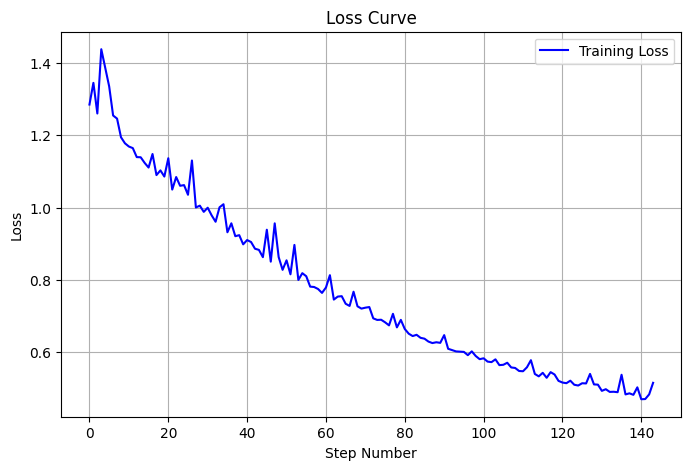

Model parameters saved to multiple outputs model.json


In [7]:
from sklearn.model_selection import train_test_split

# Sepal length and width as input
X_model = X[:, :2]

# petal length and width as output
y_model = X[:, 2:4]



X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.1, stratify=data.target)


model = LinearRegression2()
model.fit(X_train, y_train)

model.save("multiple outputs model.json")

# ***Testing***

In [8]:
model = LinearRegression2()
model.load("multiple outputs model.json")  # Ensure correct filename
predictions = model.predict(X_test)
mse = model.score(X_test, y_test)
print(f"Predictions (First 5 Samples):\n{predictions[:5]}")
print(f"Actual Values (First 5 Samples):\n{y_test[:5]}")
print(f"Mean Squared Error is: {mse}")




Model parameters loaded from multiple outputs model.json
Predictions (First 5 Samples):
[[4.02687132 1.29093164]
 [4.85485829 1.6450515 ]
 [2.617256   0.75671782]
 [2.63961306 0.75909417]
 [2.16977002 0.59088197]]
Actual Values (First 5 Samples):
[[4.6 1.4]
 [4.5 1.5]
 [1.2 0.2]
 [1.7 0.5]
 [1.4 0.2]]
Mean Squared Error is: 0.532171570237477
